In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd


In [2]:
df =pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [18]:
cf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,271
1063,3.2,6,13.2,9.5,11.5,264
1064,3.0,6,13.4,9.8,11.8,271
1065,3.2,6,12.9,9.3,11.3,260


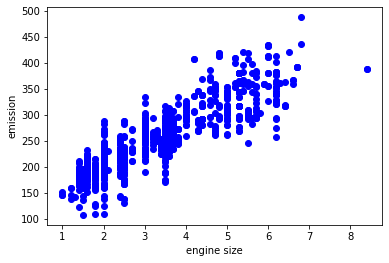

In [19]:
plt.scatter(cf.ENGINESIZE, cf.CO2EMISSIONS,color='blue')
plt.xlabel("engine size")
plt.ylabel('emission')
plt.show()

In [20]:
a=np.random.rand(len(df))<0.8
train=cf[a]
test=cf[~a]

In [21]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
print(regr.coef_)
print(regr.intercept_)


[[11.89706025  6.2521545   9.98581594]]
[64.75456368]


In [24]:
from sklearn.metrics import r2_score

test_x=np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
test_y_=regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])

In [25]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 18.72
Residual sum of squares (MSE): 639.51
R2-score: 0.85
